# 21 - Regresion Lineal Multiple Scikit


* En este Notebook vamos a resolver un problema de ***Regresión Lineal Múltiple con la librería de Scikit-Learn***.


* Para resolver el problema de regresión vamos a utilizar la clase **"LinearRegression()"**, cuya documentación esta en el siguiente enlace:<br>
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html


* El ejemplo consiste en predecir cuantas ***calorías quema una persona en función de los minutos que corre, la velocidad a la que corre y su peso corporal***. Por ello tenemos un conjunto de datos tomados de forma empírica que nos dan esa relación. 


* El objetivo es encontrar los parámetros $\beta_0, \beta_1, \beta_2, \beta_3$ que mejor se ajustan a esos datos.

<span style="font-size:18px">$$Calorias = \beta_0 + \beta_1 \cdot Tiempo + \beta_2 \cdot Velocidad + \beta_3 \cdot Peso$$</span>


* Para resolver este problema vamos a realizar los siguientes pasos:
<span></span><br>
    1. [Carga de datos](#M1)
<span></span><br>
    2. [Cambio de estructura de datos a numpy](#M2)
<span></span><br>
    3. [Visualización de los datos](#M3)
<span></span><br>
    4. [Creacción del modelo (hipótesis) y ajuste](#M4)
<span></span><br>
    5. [Obtención del modelo (hipótesis)](#M5)
<span></span><br>
    6. [Medición de la calidad de los resultados](#M6)


<hr>


* En primer lugar vamos a importar las librería necesarias:

<hr>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
%matplotlib inline 

<hr>


## <a name="M1">1. Carga de datos</a>


* El primer paso que vamos a realizar es el de cargar los datos que los tenemos en el siguiente fichero:
    - ***DataSet***: "./data/calorias_running/calories_time_weight_speed.csv"


* Para ello ***leeremos el csv con pandas*** (pasandolo a un dataframe), teniendo las siguientes columnas:
    - Calorias
    - Tiempo
    - Peso
    - Velocidad

In [2]:
df = pd.read_csv("./data/calorias_running/calories_time_weight_speed.csv")
df.sample(5)

,Calorias,Tiempo,Peso,Velocidad
1069,765.0,55.9,61.4,12.9
65,924.6,61.4,75.7,11.5
2425,740.0,66.1,69.6,9.3
89,883.2,64.5,73.0,10.9
1825,673.1,45.3,64.2,13.4


<hr>


## <a name="M2">2. Cambio de estructura de datos a numpy</a>


* Scikit necesita como entrada para el ajuste (o entrenamiento) del modelo los datos del Dataset de la siguiente forma:
<span></span><br><br>
    - ***Variables de entrada X***: ***Array de Arrays de numpy*** en el que cada array tiene las variables de entrada de un elemento.
<span></span><br><br>
    - ***Variable de salida y*** (solo para aprendizaje supervisado): ***Array de numpy*** en el que cada posición del array contiene la salida o el valor esperado del elemento del Dataset.


* Por tanto, vamos a pasar los datos de las calorias y el tiempo a una nueva estructura de datos para que scikit-learn puedan trabajar con los datos:
<span></span><br><br>
    - Las ***columnas Tiempo, Peso y Velocidad*** representan las variables independientes 'x<sub>n</sub>' y las vamos a pasar a un array de array (***numpy array***)
<span></span><br><br>
    - La ***columna calorias*** que representa la variable dependiente 'y', la vamos a pasar a un ***numpy array***


In [3]:
X = df[['Tiempo', 'Velocidad', 'Peso']].values
y = df['Calorias'].values

<hr>


## <a name="M3">3. Visualización de los datos</a>


* A continuación pasamos a mostrar visualmente las relaciones entre cada par de variables del dataset:

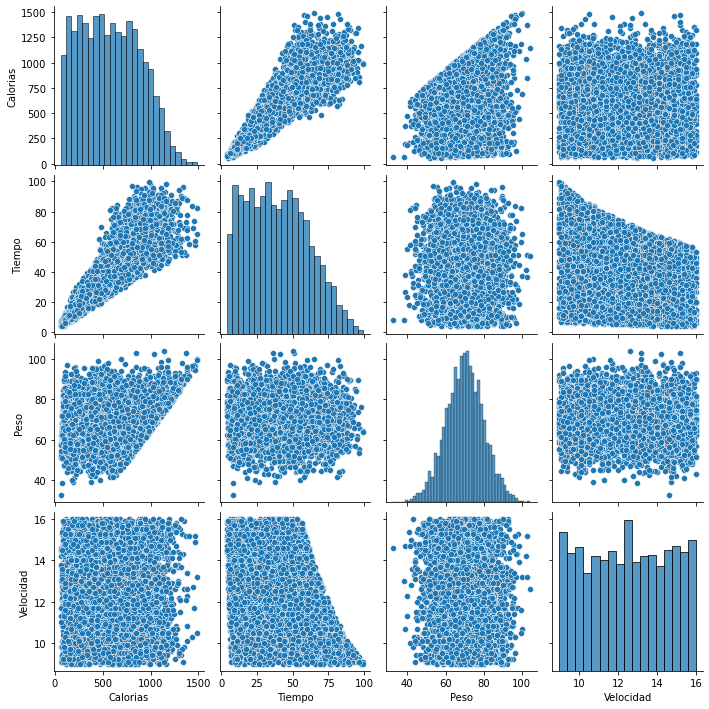

In [4]:
sns.pairplot(df)

<hr>


## <a name="M4">4. Creacción del modelo (hipótesis) y ajuste</a>


* A continuación pasamos a crear un objeto de la clase "***LinearRegression()***" para la resolución del problema de regresión.


* Una vez instanciado, procedemos a ajustar (entrenar) el modelo (o hipótesis) llamando al método ***fit(X,y)*** que recibe como parámetros el conjunto de datos de las variables independientes 'X' y la variable dependiente 'Y'.


* Una vez ajustado (o entrenado) el modelo (o hipótesis), tendremos ajustados los parámetros ***$\beta_n$*** de la siguiente manera:

<span style="font-size:18px">$$Calorias = \beta_0 + \beta_1 \cdot Tiempo + \beta_3 \cdot Velocidad + \beta_3 \cdot Peso$$</span>

In [5]:
# Creamos un objeto de la clase LinearRegression
reg_mul = linear_model.LinearRegression()

# Entrenamos el modelo pasandole las variables independientes y dependiente
reg_mul.fit(X, y)

LinearRegression()

<hr>


## <a name="M5">5. Obtención del modelo (hipótesis)</a>


* El objeto de la clase ***LinearRegression*** nos proporciona los resultados de los ajustes de la regresión por medio de los atributos de la clase:
<span></span><br><br>
    - ***coef_***: Nos da en una lista los coeficientes de la recta asociados a las variable independientes. En este caso nos da 3 ya que tenemos 3 variables independientes X.
<span></span><br><br>
    - ***intercept_***: Nos devuelve el termino independiente; es decir la ***$\beta_0$***

In [6]:
# Obtenemos los coheficientes
betas = reg_mul.coef_
beta_0 = reg_mul.intercept_

print ("Y = {b0:0.2f} + {b1:0.2f}X1 + {b2:0.2f}X2 + {b3:0.2f}X3"
       .format(b0=beta_0, b1=betas[0], b2=betas[1], b3=betas[2]))
print ("\nCalorias = {b0:0.2f} + {b1:0.2f}·Tiempo + {b2:0.2f}·Velocidad + {b3:0.2f}·Peso"
       .format(b0=beta_0, b1=betas[0], b2=betas[1], b3=betas[2]))

Y = -1164.85 + 14.26X1 + 46.66X2 + 8.55X3

Calorias = -1164.85 + 14.26·Tiempo + 46.66·Velocidad + 8.55·Peso


<hr>


## <a name="M6">6. Medición de la calidad de los resultados</a>


* Las ***clases de Scikit que implementan la interfaz "Predictors"*** tienen implementado el método **"predict(x)"** para la predicción de nuevos elementos a partir del modelo generado y también implementan otro método que es el método ***score(X,y)*** que devuelve una medida de calidad del modelo generado.


* Para el caso de la Regresión Lineal, el método ***score(X,y)*** devuelve la medida del ***Coeficiente de Determinación R<sup>2</sup>*** que es una medida que nos dice cuanto se ajusta la recta a los datos con los que se ha obtenido la recta, siendo valor '1' un ajuste perfecto y valor '0' un desajuste perfecto.

In [7]:
r2 = reg_mul.score(X, y)

print ("Coeficiente de determinación R^2: {r2}".format(r2=r2))

Coeficiente de determinación R^2: 0.9539022259261689


<hr>

*Este Notebook ha sido desarrollado por **Ricardo Moya García** y registrado en Safe Creative como ***Atribución-NoComercial-CompartirIgual***.*

<img src="./imgs/CC_BY-NC-SA.png" alt="CC BY-NC">